# GLOBAL SUPERSTORE DATASET SALES ANALYSIS
By Raju Vaneshwar Nareshwar

## 1. Task 1

### Load first 10 records

In [ ]:
# pip install packages
import sys
!{sys.executable} -m pip install geopandas

# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import requests
import geopandas as gpd

from matplotlib import ticker as mtick

# Letting pandas to show max columns
pd.set_option('display.max_columns', None)

In [ ]:
# Reading CSV file and assigning into a dataframe ss_data
global_super_store_df_org = pd.read_csv('sample-superstore-2023-T3.csv')

# Copy the dataframe before processing
global_super_store_df = global_super_store_df_org.copy();

# Set the head to 10 to retrieve the first 10 records
first_10_rows = global_super_store_df.head(n=10)
first_10_rows

### Understanding of the dataset

Using info() and describe() function to get the descriptive statistics

In [ ]:
# Get the metadata information about the dataset
global_super_store_df.info()

# Get descriptive statistics on the dataset
global_super_store_df.describe()


The primary key of these records are a system-generated, and denoted as column: *RowID*

The datatypes of the dataset are following:
* int64(1)
* float64(2)
* object(18)

A few records of *Quantity* and *Profit* columns has the datatype of object, but it must be float64, thus needs to be cleansed or transformed.  
*Ship Date* and *Order Date* columns are represented as strings, those needs to be converted as datetime.

Once cleansed, the descriptive statistics can be applied to the numerial columns, and they are Sales, Quantity, Discount and Profit.


In [45]:
def plot_histogram(data, xlabel, ylabel, title): 
    plt.figure(figsize=(20, 6))

    bars = plt.bar(data.index, data)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')
    plt.show()

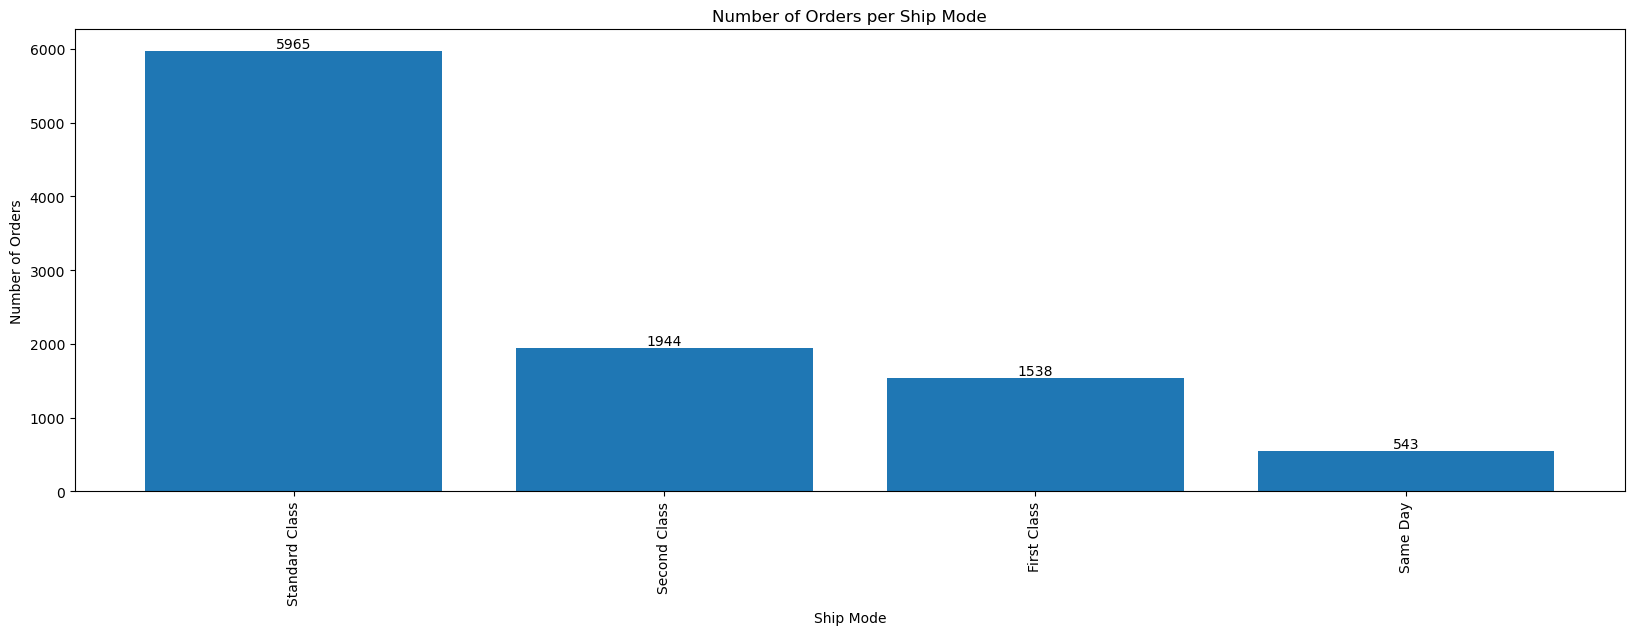

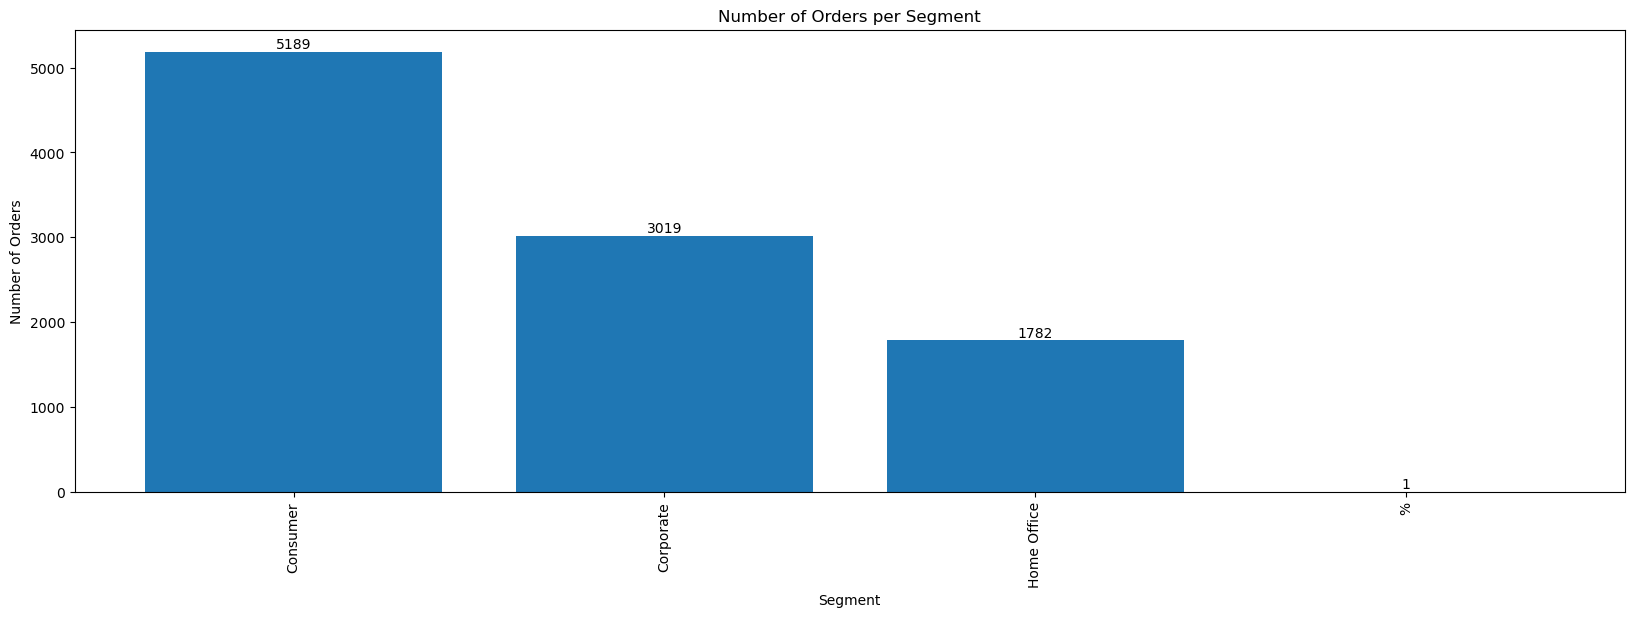

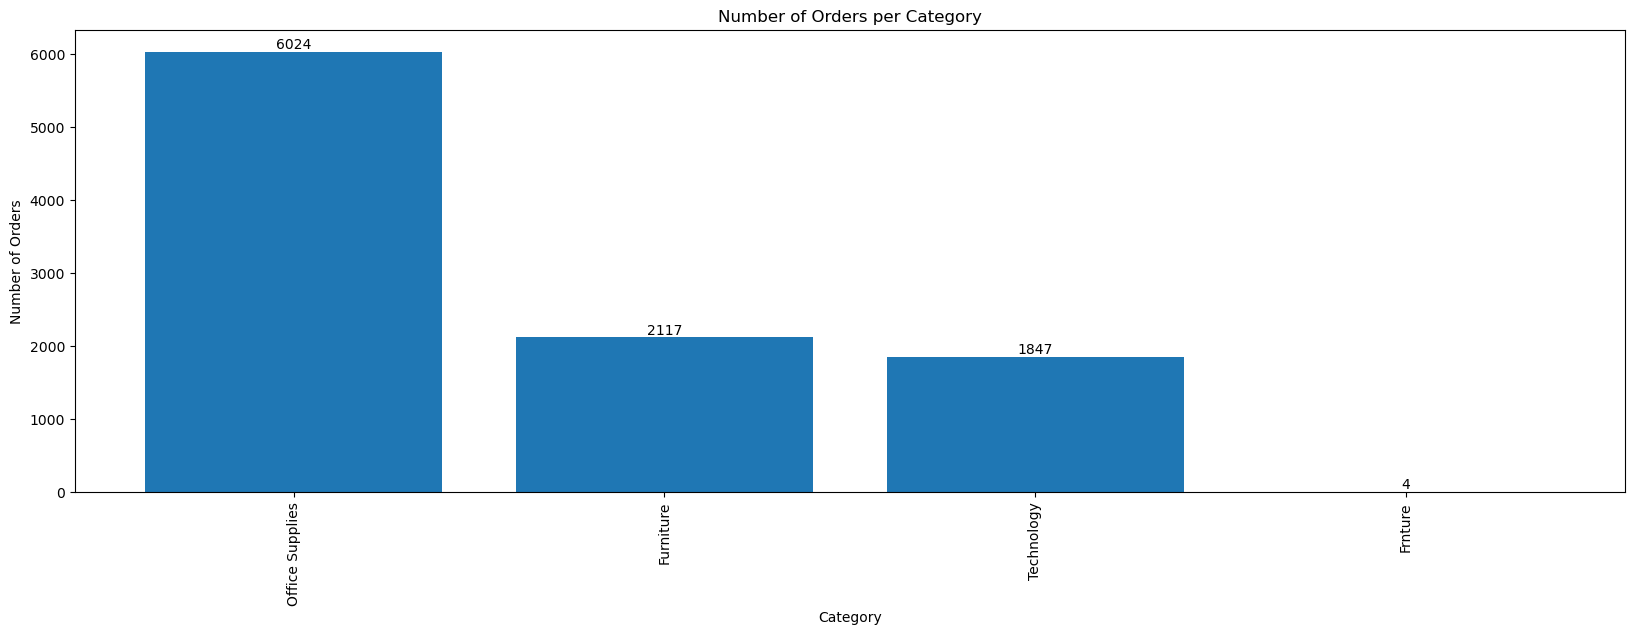

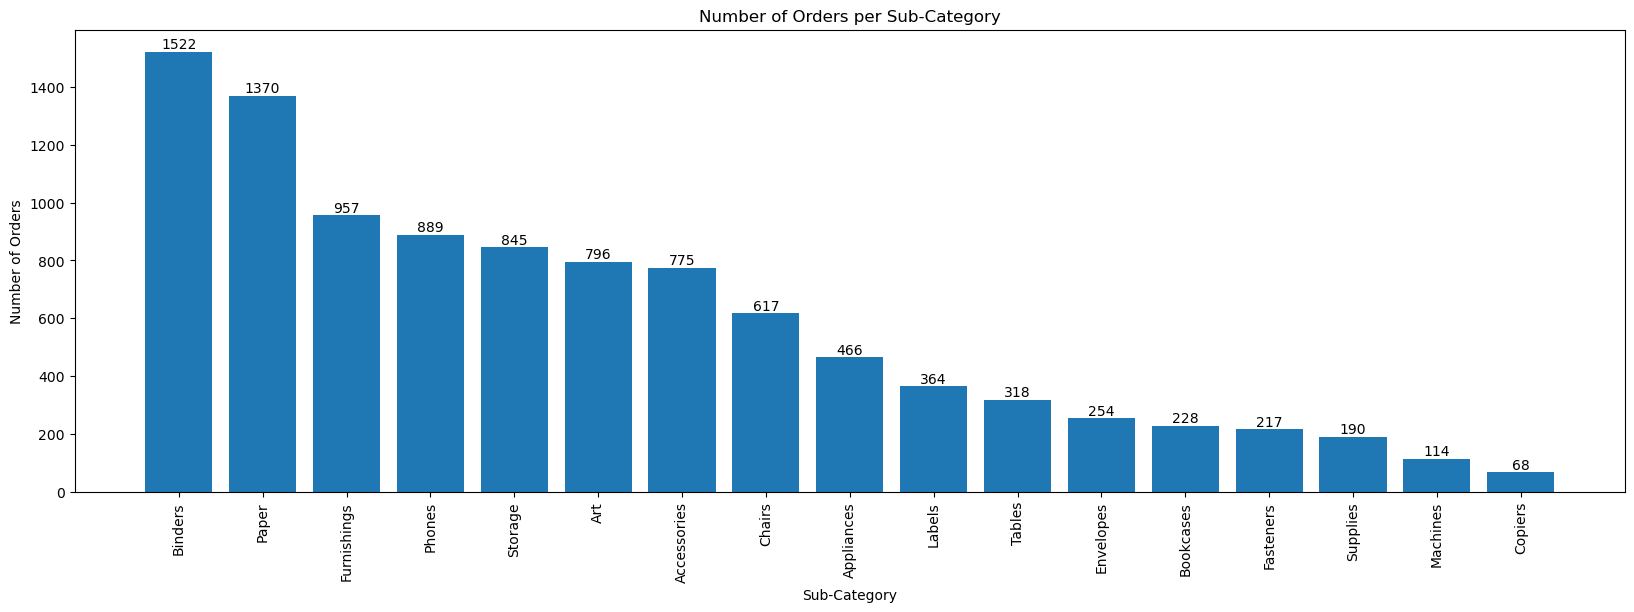

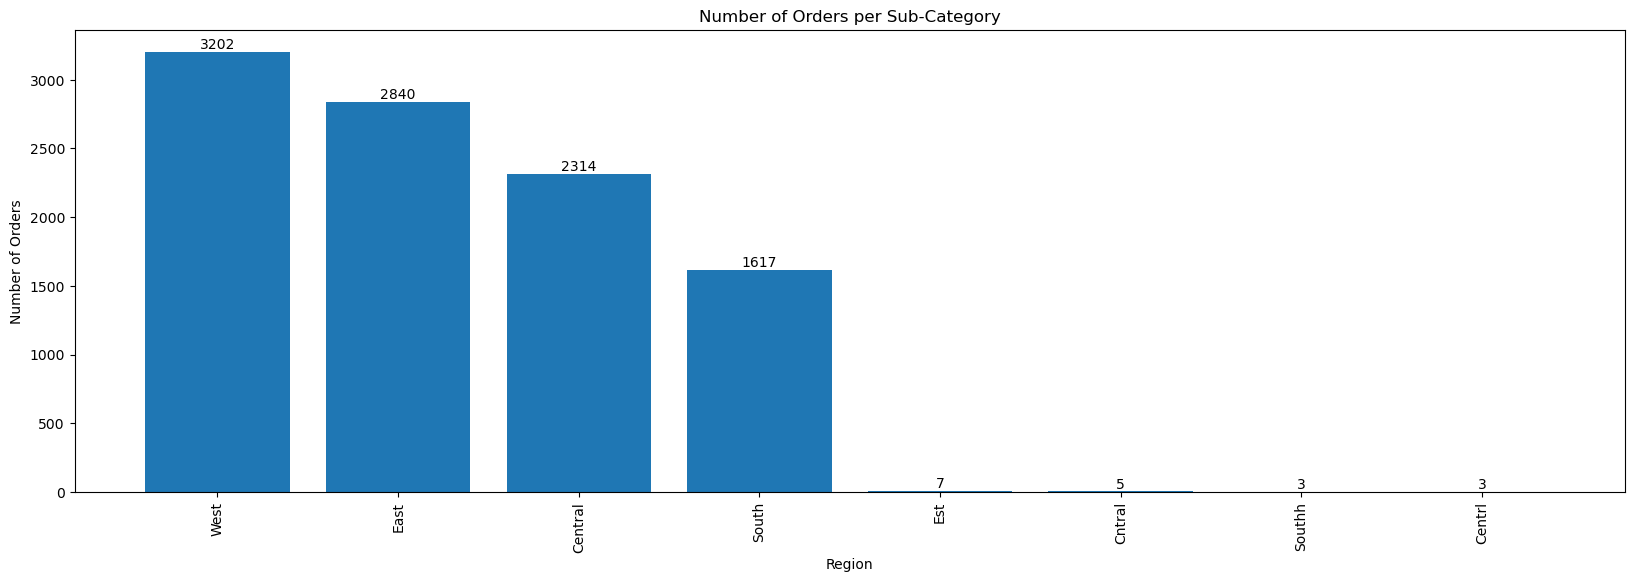

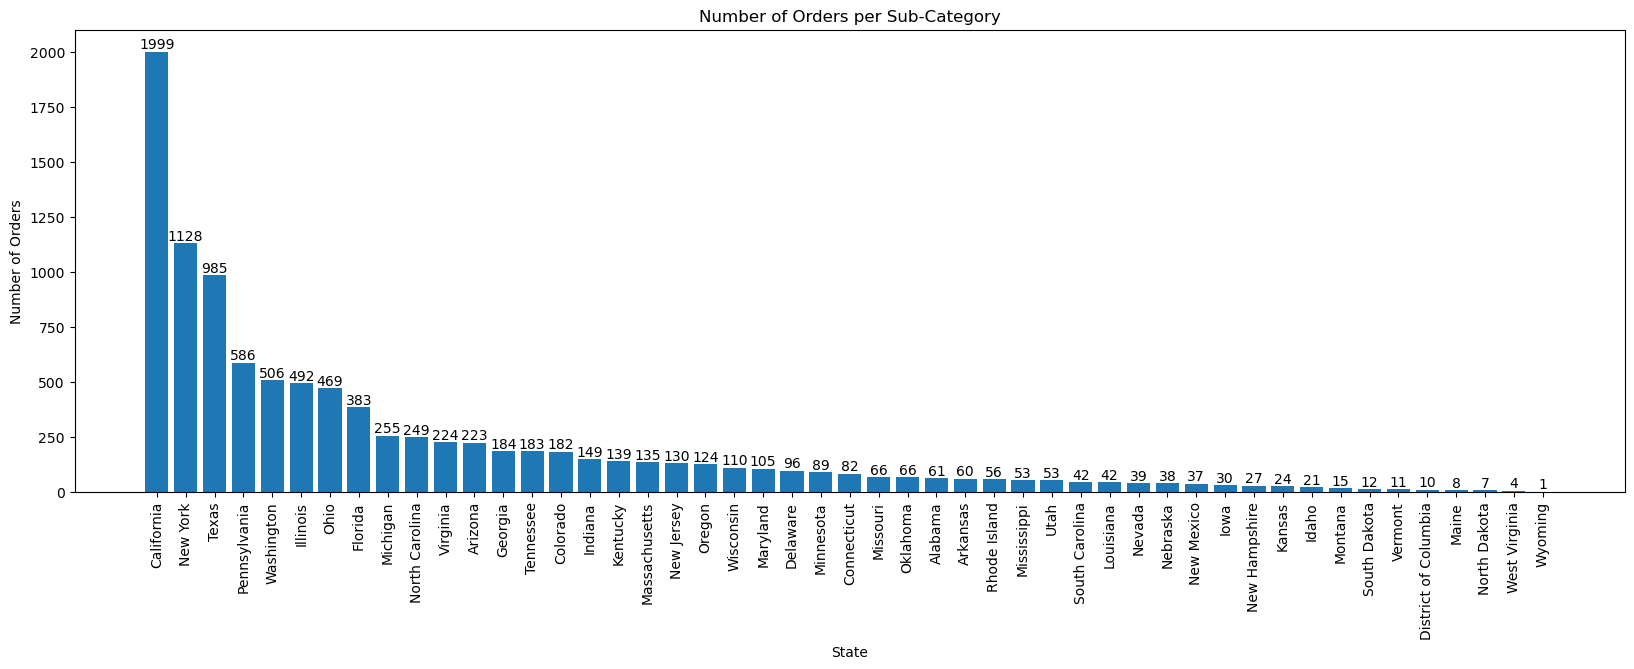

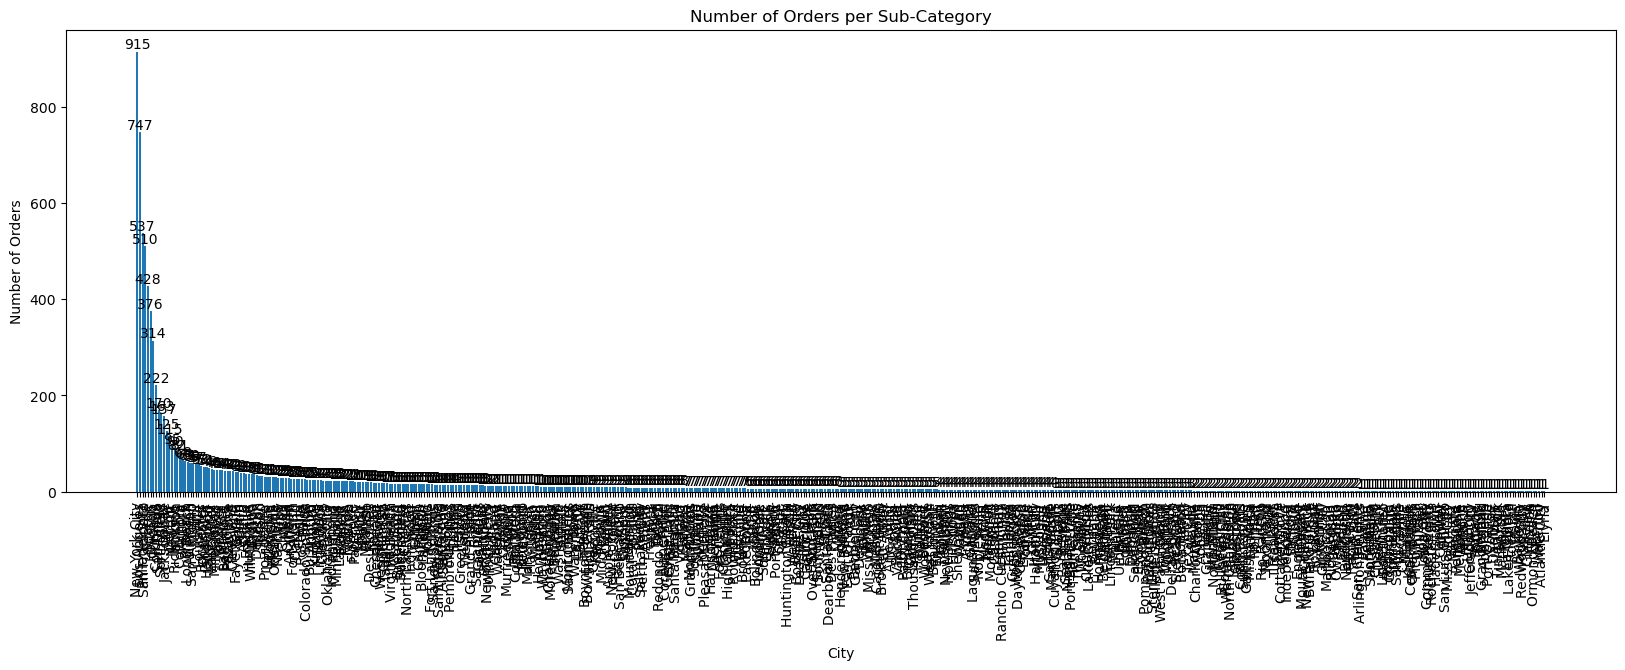

In [46]:
# Histogram for 'Ship Mode'
orders_per_segment = global_super_store_df['Ship Mode'].value_counts()
plot_histogram(orders_per_segment, 'Ship Mode', 'Number of Orders', 'Number of Orders per Ship Mode')

# Histogram for 'Segment'
orders_per_segment = global_super_store_df['Segment'].value_counts()
plot_histogram(orders_per_segment, 'Segment', 'Number of Orders', 'Number of Orders per Segment')

# Histogram for 'Category'
orders_per_category = global_super_store_df['Category'].value_counts()
plot_histogram(orders_per_category, 'Category', 'Number of Orders', 'Number of Orders per Category')

# Histogram for 'Sub-Category'
orders_per_sub_category = global_super_store_df['Sub-Category'].value_counts()
plot_histogram(orders_per_sub_category, 'Sub-Category', 'Number of Orders', 'Number of Orders per Sub-Category')

# Histogram for 'Region'
orders_per_sub_category = global_super_store_df['Region'].value_counts()
plot_histogram(orders_per_sub_category, 'Region', 'Number of Orders', 'Number of Orders per Region')

# Histogram for 'State'
orders_per_sub_category = global_super_store_df['State'].value_counts()
plot_histogram(orders_per_sub_category, 'State', 'Number of Orders', 'Number of Orders per State')



function **text2float()** will take a txt number as a parameter and convert back to float64 number.

In [ ]:
def text2float(textnum, numwords={}):
    try:
        # Attempt to convert to float
        return float(textnum)
    except ValueError:
        # If conversion to float fails, continue with text to number conversion
        textnum = textnum.lower()
        
        if not numwords:
            units = [
                "zero", "one", "two", "three", "four", "five", "six", "seven", "eight",
                "nine", "ten", "eleven", "twelve", "thirteen", "fourteen", "fifteen",
                "sixteen", "seventeen", "eighteen", "nineteen",
            ]

            tens = ["", "", "twenty", "thirty", "forty", "fifty", "sixty", "seventy", "eighty", "ninety"]

            scales = ["hundred", "thousand", "million", "billion", "trillion"]

            numwords["and"] = (1, 0)
            for idx, word in enumerate(units):
                numwords[word] = (1, idx)
            for idx, word in enumerate(tens):
                numwords[word] = (1, idx * 10)
            for idx, word in enumerate(scales):
                numwords[word] = (10 ** (idx * 3 or 2), 0)

        current = result = 0
        for word in textnum.split():
            if word not in numwords:
                raise Exception("Illegal word: " + word)

            scale, increment = numwords[word]
            current = current * scale + increment
            if scale > 100:
                result += current
                current = 0

        return result + current

In [ ]:
def get_city_from_postal_code(postal_code):
    if postal_code == '':
        return None

    url = f"http://api.zippopotam.us/us/{postal_code}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        city = data['places'][0]['place name']
        return city
    else:
        return None

In [ ]:
def get_state_from_postal_code(postal_code):
    if postal_code == '':
        return None

    url = f"http://api.zippopotam.us/us/{postal_code}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        state = data['places'][0]['state']
        return state
    else:
        return None

## 2. Task 2

### Handling missing values in the dataset

Before performing any statistical analysis, the numerical column data has to be cleansed to be meaningful.
* Records with special characters on *Quantity* and needs to be cleansed. 
* Records with special characters on *Profit* and needs to be cleansed. 
* Applying the **text2float()** function to fix *Quantity* column. 

In [ ]:
# Row ID is not needed for the analysis, hence dropping the column
if 'Row ID' in global_super_store_df.columns:
    global_super_store_df.drop('Row ID', axis=1, inplace=True)

In [ ]:
# Removing "?" from Quantity column
global_super_store_df['Quantity'] = global_super_store_df['Quantity'].str.replace('?', '')

# Removing """ from Profit column
global_super_store_df['Profit'] = global_super_store_df['Profit'].str.replace('"', '')

# Assuming zero values for NaN on Profits
global_super_store_df['Profit'] = global_super_store_df['Profit'].fillna(0)

# Removing """ from Postal Code column
global_super_store_df['Postal Code'] = global_super_store_df['Postal Code'].str.replace('"', '')

# Make all records as Country = United States
global_super_store_df['Country'] = 'United States'

# Correcting spelling mistakes on Category column
global_super_store_df['Category'] = global_super_store_df['Category'].replace('Frnture', 'Furniture')

# Filling values on empty Category/Sub-Category records
global_super_store_df['Category'] = global_super_store_df['Category'].fillna('NO_CATEGORY')
global_super_store_df['Sub-Category'] = global_super_store_df['Sub-Category'].fillna('NO_SUB_CATEGORY')

# Datafix on Category based on subcategories
# Apply the condition element-wise
condition = (global_super_store_df['Category'] == 'NO_CATEGORY') & \
            (global_super_store_df['Sub-Category'].isin(['Binders', 'Storage']))

# Update 'Category' where the condition is True
global_super_store_df.loc[condition, 'Category'] = 'Office Supplies'


In [ ]:
# Cleanse the Regions
central_regions_to_replace = ['Centrl', 'Cntral']
east_regions_to_replace = ['Est']
south_regions_to_replace = ['Southh']

global_super_store_df['Region'] = global_super_store_df['Region'].replace(central_regions_to_replace, 'Central')
global_super_store_df['Region'] = global_super_store_df['Region'].replace(east_regions_to_replace, 'East')
global_super_store_df['Region'] = global_super_store_df['Region'].replace(south_regions_to_replace, 'South')

In [ ]:
# Applying get_state_from_postal_code function

# Filter the empty state rows
state_filtered_na = global_super_store_df.loc[pd.isna(global_super_store_df['State'])]
state_filtered_na

# Apply the function to fill the missing value via API
global_super_store_df.loc[pd.isna(global_super_store_df['State']), 'State'] = state_filtered_na['Postal Code'].apply(get_state_from_postal_code)

In [ ]:
# Applying get_city_from_postal_code function

# Filter the empty city rows
city_filtered_na = global_super_store_df.loc[pd.isna(global_super_store_df['City'])]
city_filtered_na

# Apply the function to fill the missing value via API
global_super_store_df.loc[pd.isna(global_super_store_df['City']), 'City'] = city_filtered_na['Postal Code'].apply(get_city_from_postal_code)

In [ ]:
# Applying text2float function
global_super_store_df['Quantity'] = global_super_store_df['Quantity'].apply(text2float)
global_super_store_df['Profit'] = global_super_store_df['Profit'].apply(text2float)

### Descriptive statistics

In [ ]:
global_super_store_df.describe()

In [ ]:
# Columns with missing data
print(f"Sum of null records:\n{global_super_store_df.isnull().sum()}")

### Grouping of data

#### Grouping Sales/Profits based on Categories

In [ ]:
unique_categories = global_super_store_df['Category'].unique()
print(unique_categories)

In [ ]:
# group total sales by category from the highest sale.
sales_category = global_super_store_df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
sales_category

In [ ]:
# group total profits by category
profit_category = global_super_store_df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
profit_category

In [ ]:
# group total sales by category, only considering positive sales
sales_based_on_category = global_super_store_df.groupby('Category').filter(lambda x: x['Sales'].sum() > 0).groupby('Category')['Sales'].sum()

# group total profit by category, only considering positive profits
profit_category = global_super_store_df.groupby('Category').filter(lambda x: x['Profit'].sum() > 0).groupby('Category')['Profit'].sum()

# figure size
plt.figure(figsize=(16,12));

# left total sales pie chart
plt.subplot(1,2,1); # 1 row, 2 columns, the 1st plot.
plt.pie(sales_category.values, labels=sales_category.index, startangle=90, counterclock=False,
        autopct=lambda p:f'{p:.1f}% \n £{p*np.sum(sales_category.values)/100 :,.0f}', 
        wedgeprops={'linewidth': 1, 'edgecolor':'black', 'alpha':0.75});
plt.axis('square');
plt.title('Total Sales by Category',  fontdict={'fontsize':16});

# right total profits pie chart
plt.subplot(1,2,2); # 1 row, 2 columns, the 2nd plot
plt.pie(profit_category.values, labels=profit_category.index, startangle=90, counterclock=False,
        autopct=lambda p:f'{p:.1f}% \n ${p*np.sum(profit_category.values)/100 :,.0f}',
        wedgeprops={'linewidth': 1, 'edgecolor':'black', 'alpha':0.75});
plt.axis('square');
plt.title('Total Profit by Category', fontdict={'fontsize':16});

 > _Total Sales on Categories_

1. Technology at 36.4% 
2. Furniture at 32.3%
3. Office Supplies at 31.3%

Sales depict a near-perfect symmmetery on categories, with **Technology** winning with a slight edge.

 > _Total Profits on Categories_

1. Technology at 50.1%
2. Office Supplies at 42.7%
3. Furniture at 7.2%

Profits are largely taken by **Technology** category with *Office Supplies* being the lowest.

#### Grouping Sales/Profits based on Sub-Categories

In [ ]:
unique_sub_categories = global_super_store_df['Sub-Category'].unique()
unique_sub_categories

In [ ]:
# group total sales by sub-category from the highest sale.
sales_sub_category = global_super_store_df.groupby(['Sub-Category'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)
sales_sub_category

In [ ]:
# group total profit by sub-category from the highest profit.
profit_sub_category = global_super_store_df.groupby(['Sub-Category'], as_index=False)['Profit'].sum().sort_values(by='Sub-Category')
profit_sub_category

In [ ]:
#Grouping the data on category and it's respective sub-categories. Calculating the profit margin.
sales_per_cat_subcat = global_super_store_df.groupby(['Category', 'Sub-Category'], as_index=False)[['Sales', 'Profit']].sum()
sales_per_cat_subcat['Profit Margin %'] = (sales_per_cat_subcat['Profit'] / sales_per_cat_subcat['Sales']) * 100

#Sorting the dataframe based on profit margin
sales_per_cat_subcat = sales_per_cat_subcat.sort_values(by=['Profit Margin %'], ascending=False)
sales_per_cat_subcat

#### Grouping Sales/Profits based on States

In [ ]:
# group total sales by states from the highest sale.
sales_by_states = global_super_store_df.groupby(['State'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)
sales_by_states['Sales %'] = (sales_by_states['Sales'] / global_super_store_df['Sales'].sum()) * 100
print(sales_by_states.describe())
sales_by_states

> **State which made the highest sales:** California
> 
> **State which made the lowest sales:** North Dakota

#### Grouping Sales/Profits based on Segment

In [ ]:
# group total sales by segments from the highest sale.
sales_by_segment = global_super_store_df.groupby(['Segment'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)
sales_by_segment['Sales %'] = (sales_by_segment['Sales'] / global_super_store_df['Sales'].sum()) * 100
sales_by_segment

**Consumer** Segment has 50% of Sales share, followed by **Corporate** and **Home Office**.

#### Grouping Sales/Profits based on Shipping Mode

In [ ]:
# group total sales by segments from the highest sale.
sales_by_ship_mode = global_super_store_df.groupby(['Ship Mode'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)
sales_by_ship_mode['Sales %'] = (sales_by_ship_mode['Sales'] / global_super_store_df['Sales'].sum()) * 100
sales_by_ship_mode

**Standard** shipping method is preferred as the sales percentage is nearly 60%, followed by **Second Class** and **First Class**. 
**Same Day** is not an economical option, so only preferred by 5% of the orders.

Cleaning the Order Date

In [ ]:
global_super_store_df['Order Date'] = global_super_store_df['Order Date'].str.replace('$April', '')

In [ ]:
global_super_store_df['Order Date'] = pd.to_datetime(global_super_store_df['Order Date'], format='%d/%m/%Y')
global_super_store_df['Ship Date'] = pd.to_datetime(global_super_store_df['Ship Date'], format='%d/%m/%Y')

In [ ]:
global_super_store_df['Shipment Days'] = (global_super_store_df['Ship Date'] - global_super_store_df['Order Date']).dt.days
sales_by_ship_mode_days = global_super_store_df.groupby(['Ship Mode'], as_index=False)['Shipment Days'].sum().sort_values(by='Shipment Days', ascending=False)


In [ ]:
def swap_month_and_date(ship_date):
    ship_date_swapped_as_str = dt.datetime.strftime(ship_date, '%Y-%d-%m %H:%M:%S')
    return pd.to_datetime(ship_date_swapped_as_str, format='%d/%m/%Y')

In [ ]:
swap_month_and_date(dt.datetime.now())

In [ ]:
# Assumption:
# All ship modes must deliver within 30 days
# if it is more than 30 days, then it is not acceptable
acceptable_shipment_days = np.arange(0, 31)

# Get the all the records out of that filter to fix
ship_date_fix_condition = (~global_super_store_df['Shipment Days'].isin(acceptable_shipment_days)) & \
                            (~global_super_store_df['Ship Date'].isna()) & \
                            (~global_super_store_df['Order Date'].isna())

# Apply a function to swap the date and month
global_super_store_df.loc[ship_date_fix_condition, 'Ship Date'] = global_super_store_df.loc[ship_date_fix_condition, 'Ship Date'].apply(swap_month_and_date)


    # lambda x: pd.to_datetime(dt.datetime.strftime(x, '%Y-%d-%m %H:%M:%S')))


In [ ]:
global_super_store_df['Shipment Days'] = (global_super_store_df['Ship Date'] - global_super_store_df['Order Date']).dt.days
global_super_store_df.to_csv('01052024.csv')

Problems with fixing the dates:

1. We cannot take meaningful stats on the Order/Ship Dates
2. A few records are in dd-mm-yyyy and a few of them are in mm-dd-yyyy
3. Worst case in many scenarios, the Order Date is in dd-mm-yyyy and Ship Date is in mm-dd-yyyy and vice versa.
4. The best we can do it see an year-on-year time series analysis

### Univariate analysis and visualisation

#### Profit Margin by Sub-categories

In [ ]:
#Grouping the data on category and it's respective sub-categories. Calculating the profit margin.
sales_per_cat_subcat = global_super_store_df.groupby(['Category', 'Sub-Category'], as_index=False)[['Sales', 'Profit']].sum()
sales_per_cat_subcat['Profit Margin'] = sales_per_cat_subcat['Profit'] / sales_per_cat_subcat['Sales']

#Sorting the dataframe based on profit margin
sales_per_cat_subcat = sales_per_cat_subcat.sort_values(by=['Category', 'Sub-Category', 'Profit Margin'], ascending=True)

# plot a profit margins sub-category bar chart 
fig, ax = plt.subplots(figsize=(14,10))

# Unique sub categories without NO_SUB_CATEGORY
unique_sub_categories_without_custom_label = sales_per_cat_subcat[sales_per_cat_subcat['Sub-Category'] != 'NO_SUB_CATEGORY']['Sub-Category'].unique()

#Plotting the profit margin per sub-category.
sns.barplot(y=sales_per_cat_subcat['Sub-Category'], x=sales_per_cat_subcat['Profit Margin'], hue=sales_per_cat_subcat['Category'], 
                alpha=1, dodge=False, ax=ax, order=unique_sub_categories_without_custom_label)

#Cleaning out bar junk
ax.spines['left'].set_position('zero')
ax.spines[['right','top']].set_visible(False)
ax.set(ylabel=None, xlabel='Profit Margin (%)')

def move_ylabel_tick(index: list):
    """
    Moving the provided ylabel ticks
    """
    for tick in index:
        ax.get_yticklabels()[tick].set_x(0.02)
        ax.get_yticklabels()[tick].set_horizontalalignment('right')

#Moving the y-labels on sub-categories that are making a loss in order to prevent collision of the bar and the text.
move_ylabel_tick([-1, -2, -3])

#Annotating the profit margin amount for each bar.
for p in ax.patches:
    _, y = p.get_xy()
    
    ax.annotate(f'{p.get_width()*100 :.1f}%', (p.get_width() / 2, y + 0.45))
    
#Calculating Superstore's aggregate profit margin in order to compare it to each sub-category's profit margin
mean_profit = sales_per_cat_subcat['Profit'].sum() / sales_per_cat_subcat['Sales'].sum()

#Plotting a vertical line and annotating the Superstore's aggregate profit margin.
ax.axvline(mean_profit, color='blue', label='Mean Profit, All Categories', alpha=0.75, ls='-.')

#Setting the title and legend.
ax.set_title('Profit Margin by Sub-Category', fontdict={'fontsize':16})
ax.legend(loc=(1, 0.9))

#Formatting the x-axis as %
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

#### Geo Analysis

In [ ]:
base_folder_path = os.getcwd()
shp_path = '/data/usa-states-census-2014.shp'

states = gpd.read_file(f'{base_folder_path}{shp_path}')
states = states.to_crs("EPSG:3395")

# Group data based on States
sales_per_states = global_super_store_df.groupby(['State'], as_index=False)[['Sales']].sum()

# Create a new column to see the Sales %
sales_per_states['Sales %'] = (sales_per_states['Sales'] / global_super_store_df['Sales'].sum()) * 100

# Merge sales data with the US map based on state codes or names
merged_data = states.merge(sales_per_states, how='left', left_on='NAME', right_on='State')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
states.plot(ax=ax, color='lightgrey', edgecolor='black')
merged_data.plot(column='Sales %', cmap='Spectral', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, aspect='equal')
ax.axis('off')
ax.set_title('Sales by US State', loc='center', fontsize=14, y=1.0)
plt.show()

#### Time series analysis

### Correlation 

In [ ]:
#Select Numerical Features
numerical_features = ['Sales', 'Quantity', 'Discount', 'Profit']
global_super_store_numerial_data = global_super_store_df[numerical_features]

correlation_matrix = global_super_store_numerial_data.corr()
correlation_matrix

import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation matrix as heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


#### Outlier Treatment

##### Interquartile Range (IQR) Method

In [ ]:
numerical_features = ['Sales', 'Quantity', 'Discount', 'Profit']

for numerical_feature in numerical_features:
    q1 = global_super_store_df[numerical_feature].quantile(0.25)
    q3 = global_super_store_df[numerical_feature].quantile(0.75)
    
    iqr = q3 - q1
    
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5* iqr

    outliers_df = global_super_store_df[(global_super_store_df[numerical_feature] < lower_limit)|(global_super_store_df[numerical_feature] > upper_limit)]
    sns.boxplot(outliers_df)
    print(f"Outlier numerical feature: {numerical_feature}, Outlier Count: {outliers_df[numerical_feature].count()}")